<a href="https://colab.research.google.com/github/bharti001/Machine-Learning-/blob/main/Week_03_Bonus_bharti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

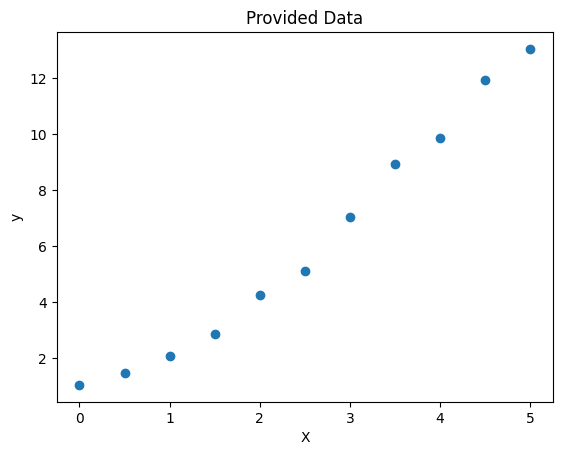

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Provided raw data arrays
X = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
5.0]).reshape(-1, 1)
y = np.array([1.05, 1.47, 2.09, 2.87, 4.25, 5.12, 7.05, 8.91, 9.87,
11.92, 13.03])
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Provided Data')
plt.show()

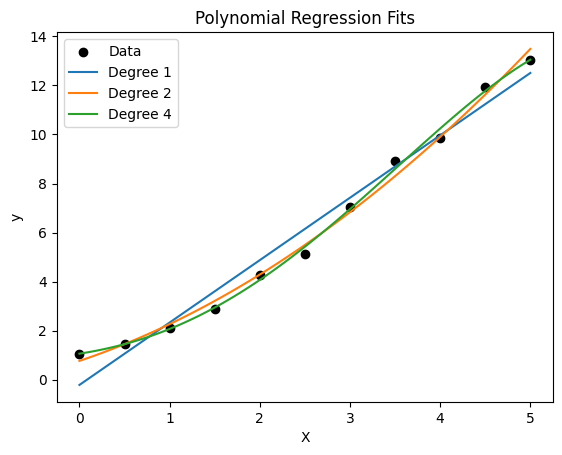

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
degrees = [1, 2, 4]
plt.scatter(X, y, color='black', label='Data')
# Dense grid for smooth curve
X_fit = np.linspace(0, 5, 100).reshape(-1,1)
for degree in degrees:
    # 1. Create polynomial features for 'degree'
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    X_fit_poly = poly_features.transform(X_fit)
    # 2. Fit LinearRegression model on transformed X
    model = LinearRegression()
    model.fit(X_poly, y)
    # 3. Predict y values for X_fit transformed features
    y_fit = model.predict(X_fit_poly)
    # 4. Plot the predicted curve with label showing degree
    plt.plot(X_fit, y_fit, label=f'Degree {degree}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fits')
plt.legend()
plt.show()

1. **How does increasing the polynomial degree affect the model fit?**

    As the polynomial degree increases, the model becomes more flexible and can capture more complex patterns in the data.
    Degree 1 (linear) provides the simplest fit, a straight line.
    Degree 2 (quadratic) provides a curved fit, capturing some non-linearity.
    Degree 4 provides a more complex curve that attempts to pass closer to all the data points.

2. **Which degree seems to underfit or overfit? Why?**
    
    Underfitting: The Degree 1 (linear) model appears to underfit the data. It doesn't capture the data points, resulting in a poor fit. It's too simple for the underlying relationship.
    Overfitting: The Degree 4 model might be overfitting. While it fits the training data points very closely, it may be capturing noise rather than the true underlying pattern. This can lead to poor performance on new, unseen data.

    The Degree 2 model seems to provide a reasonable balance between fitting the data and maintaining simplicity.

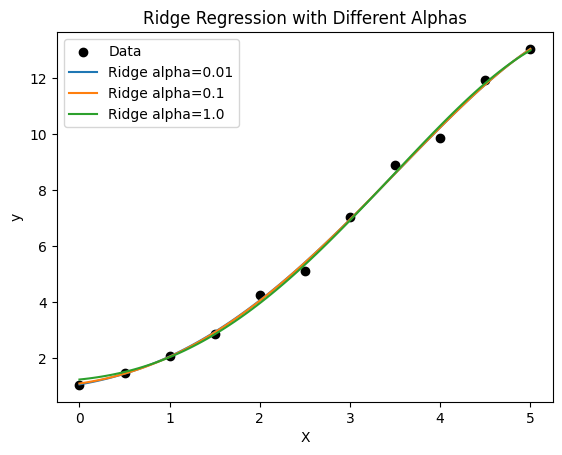

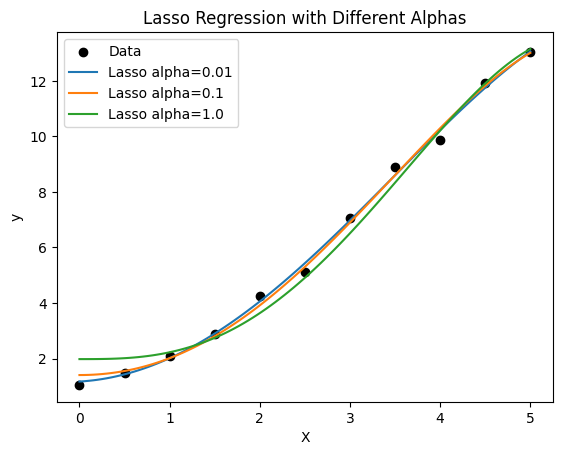

In [11]:
from sklearn.linear_model import Ridge, Lasso
alphas = [0.01, 0.1, 1.0]
# Generate degree 4 polynomial features once
poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(X)
X_fit_poly = poly.transform(np.linspace(0, 5, 100).reshape(-1,1))
# Ridge regression plots
plt.scatter(X, y, color='black', label='Data')
for alpha in alphas:
    # Fit Ridge(alpha=alpha) on X_poly, y
    model = Ridge(alpha=alpha)
    model.fit(X_poly, y)
    # Predict on X_fit_poly
    y_fit = model.predict(X_fit_poly)
    # Plot the prediction with label 'Ridge alpha=...'
    plt.plot(X_fit, y_fit, label=f'Ridge alpha={alpha}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression with Different Alphas')
plt.legend()
plt.show()
# Lasso regression plots
plt.scatter(X, y, color='black', label='Data')
for alpha in alphas:
    # Fit Lasso(alpha=alpha, max_iter=10000) on X_poly, y
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(X_poly, y)
    # Predict on X_fit_poly
    y_fit = model.predict(X_fit_poly)
    # Plot the prediction with label 'Lasso alpha=...'
    plt.plot(X_fit, y_fit, label=f'Lasso alpha={alpha}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lasso Regression with Different Alphas')
plt.legend()
plt.show()

1. **How does increasing alpha affect model complexity and fit in Ridge vs Lasso?**
   - **Ridge Regression:** Increasing the alpha value in Ridge regression increases the regularization strength. This penalizes larger coefficients, shrinking them towards zero but rarely making them exactly zero. This reduces model complexity and helps to prevent overfitting, leading to a smoother fit.
   - **Lasso Regression:** Similar to Ridge, increasing the alpha value in Lasso regression increases the regularization strength. Lasso also penalizes larger coefficients, but it has a tendency to shrink some coefficients exactly to zero. This performs feature selection by effectively removing features with zero coefficients, resulting in a simpler model.

2. **Compare Ridge and Lasso fits to plain polynomial regression. What differences do you observe?**
   - **Plain Polynomial Regression (Degree 4):** The degree 4 polynomial regression fits the training data very closely, potentially overfitting, especially if there is noise in the data. The curve is more flexible and can capture more complex patterns in the data.
   - **Ridge Regression:** Ridge regression with increasing alpha values produces smoother curves that are less prone to overfitting than the high-degree polynomial regression. The larger the alpha, the more the coefficients are shrunk, resulting in a simpler model and a less complex curve.
   - **Lasso Regression:** Lasso regression with increasing alpha values also produces smoother curves and can lead to models with fewer non-zero coefficients. This means that Lasso can effectively select the most important features. For larger alpha values, some coefficients might become zero, leading to a sparser model than Ridge.

3. **When might you choose Lasso over Ridge?**
   One might choose Lasso over Ridge regression when one suspects that many features are irrelevant or when one wants to perform feature selection automatically. Because Lasso can shrink coefficients to exactly zero, it can effectively remove irrelevant features from the model, leading to a simpler and more interpretable model. If we have a large number of features and believe only a subset is important, Lasso can be a good choice. Ridge is generally preferred when all features are believed to be potentially relevant, as it shrinks coefficients but rarely eliminates them entirely.